In [1]:
from zipfile import ZipFile
import pandas as pd
import seaborn as sns
import tensorflow as tf
import IPython.display
import os
import datetime
import IPython
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [2]:
url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = keras.utils.get_file(origin=url, fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()
csv_path = "jena_climate_2009_2016.csv"

13568290/13568290 [==============================] - 0s 0us/step


In [3]:
df = pd.read_csv(csv_path)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
df= df.drop(columns=['Tpot (K)','Tdew (degC)','rh (%)','VPact (mbar)','max. wv (m/s)', 'H2OC (mmol/mol)'])
df.head()

,Date Time,p (mbar),T (degC),VPmax (mbar),VPdef (mbar),sh (g/kg),rho (g/m**3),wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,3.33,0.22,1.94,1307.75,1.03,152.3
1,01.01.2009 00:20:00,996.57,-8.41,3.23,0.21,1.89,1309.80,0.72,136.1
2,01.01.2009 00:30:00,996.53,-8.51,3.21,0.20,1.88,1310.24,0.19,171.6
3,01.01.2009 00:40:00,996.51,-8.31,3.26,0.19,1.92,1309.19,0.34,198.0
4,01.01.2009 00:50:00,996.51,-8.27,3.27,0.19,1.92,1309.00,0.32,214.3


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),420551.0,989.212776,8.358481,913.60,984.20,989.58,994.72,1015.35
T (degC),420551.0,9.450147,8.423365,-23.01,3.36,9.42,15.47,37.28
VPmax (mbar),420551.0,13.576251,7.739020,0.95,7.78,11.82,17.60,63.77
VPdef (mbar),420551.0,4.042412,4.896851,0.00,0.87,2.19,5.30,46.01
sh (g/kg),420551.0,6.022408,2.656139,0.50,3.92,5.59,7.80,18.13
rho (g/m**3),420551.0,1216.062748,39.975208,1059.45,1187.49,1213.79,1242.77,1393.54
wv (m/s),420551.0,1.702224,65.446714,-9999.00,0.99,1.76,2.86,28.49
wd (deg),420551.0,174.743738,86.681693,0.00,124.90,198.10,234.10,360.00


In [6]:
bad_wv = df['wv (m/s)'] == -9999.0
df['wv (m/s)'][bad_wv] = 0.0
df.describe().transpose()

<ipython-input-6-f52ecf5e8df0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wv (m/s)'][bad_wv] = 0.0


,count,mean,std,min,25%,50%,75%,max
p (mbar),420551.0,989.212776,8.358481,913.60,984.20,989.58,994.72,1015.35
T (degC),420551.0,9.450147,8.423365,-23.01,3.36,9.42,15.47,37.28
VPmax (mbar),420551.0,13.576251,7.739020,0.95,7.78,11.82,17.60,63.77
VPdef (mbar),420551.0,4.042412,4.896851,0.00,0.87,2.19,5.30,46.01
sh (g/kg),420551.0,6.022408,2.656139,0.50,3.92,5.59,7.80,18.13
rho (g/m**3),420551.0,1216.062748,39.975208,1059.45,1187.49,1213.79,1242.77,1393.54
wv (m/s),420551.0,2.130191,1.542334,0.00,0.99,1.76,2.86,28.49
wd (deg),420551.0,174.743738,86.681693,0.00,124.90,198.10,234.10,360.00


In [7]:
wv = df.pop('wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi/180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)
df.head()

,Date Time,p (mbar),T (degC),VPmax (mbar),VPdef (mbar),sh (g/kg),rho (g/m**3),Wx,Wy
0,01.01.2009 00:10:00,996.52,-8.02,3.33,0.22,1.94,1307.75,-0.911955,0.478787
1,01.01.2009 00:20:00,996.57,-8.41,3.23,0.21,1.89,1309.80,-0.518797,0.499249
2,01.01.2009 00:30:00,996.53,-8.51,3.21,0.20,1.88,1310.24,-0.187962,0.027756
3,01.01.2009 00:40:00,996.51,-8.31,3.26,0.19,1.92,1309.19,-0.323359,-0.105066
4,01.01.2009 00:50:00,996.51,-8.27,3.27,0.19,1.92,1309.00,-0.264351,-0.180328


In [8]:
features= df.drop(columns='Date Time')
features.index=df['Date Time']
features.head()

,p (mbar),T (degC),VPmax (mbar),VPdef (mbar),sh (g/kg),rho (g/m**3),Wx,Wy
Date Time,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,3.33,0.22,1.94,1307.75,-0.911955,0.478787
01.01.2009 00:20:00,996.57,-8.41,3.23,0.21,1.89,1309.80,-0.518797,0.499249
01.01.2009 00:30:00,996.53,-8.51,3.21,0.20,1.88,1310.24,-0.187962,0.027756
01.01.2009 00:40:00,996.51,-8.31,3.26,0.19,1.92,1309.19,-0.323359,-0.105066
01.01.2009 00:50:00,996.51,-8.27,3.27,0.19,1.92,1309.00,-0.264351,-0.180328


In [10]:
def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

In [13]:
step = 6
past = 72
future = 6
learning_rate = 0.001
batch_size = 256
epochs = 10
train_ratio = 0.65
shape = int(df.shape[0])
train_split = int(train_ratio * shape)
val_ratio = 0.2
val_split = int(val_ratio * shape) 
test_ratio = 0.15
test_split = int(test_ratio * shape)+ 1
f_shape = features.shape[0]
if (train_split + test_split + val_split == f_shape):
  print ('Ok')

Ok


In [14]:
features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

,0,1,2,3,4,5,6,7
0,0.925613,-1.926901,-1.274405,-0.771040,-1.456890,2.160783,-0.137481,0.573384
1,0.931509,-1.971888,-1.287577,-0.773167,-1.475815,2.210659,0.057339,0.586569
2,0.926793,-1.983424,-1.290211,-0.775295,-1.479600,2.221364,0.221277,0.282761
3,0.924434,-1.960353,-1.283625,-0.777422,-1.464460,2.195817,0.154184,0.197177
4,0.924434,-1.955739,-1.282308,-0.777422,-1.464460,2.191195,0.183424,0.148681


In [15]:
train_data = features.loc[0:train_split - 1]
print(train_data.shape)
test_data = features.loc[train_split:train_split + test_split -1]
print(test_data.shape)
val_data = features.loc[train_split + test_split:]
print(val_data.shape)

(273358, 8)
(63083, 8)
(84110, 8)


In [16]:
start = past + future
print("Start= ", start)
end = start + train_split
print("End= ", end)
x_train = train_data.values
print(x_train.shape)
y_train = features.iloc[start:end][[1]]
print(y_train.shape)
sequence_length = int(past / step)
print("Sequence length= ", sequence_length)
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

Start=  78
End=  273436
(273358, 8)
(273358, 1)
Sequence length=  12


In [17]:
x_end = len(val_data) - past - future
label_start = train_split + test_split + past + future
x_val = val_data.iloc[:x_end].values
y_val = features.iloc[label_start:label_start+x_end][[1]]
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [18]:
for batch in dataset_train.take(1):
    inputs, targets = batch
print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 12, 8)
Target shape: (256, 1)


In [19]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
GRU_1 = keras.layers.GRU(32, return_sequences=True)(inputs)
GRU_2 = keras.layers.GRU(32)(GRU_1)
outputs = keras.layers.Dense(1)(GRU_2)
model_1 = keras.Model(inputs=inputs, outputs=outputs)
model_1.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12, 8)]           0         
                                                                 
 gru (GRU)                   (None, 12, 32)            4032      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [21]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
RNN_1 = keras.layers.SimpleRNN(32, return_sequences=True)(inputs)
RNN_2 = keras.layers.SimpleRNN(32)(RNN_1)
outputs = keras.layers.Dense(1)(RNN_2)
model_2 = keras.Model(inputs=inputs, outputs=outputs)
model_2.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 12, 8)]           0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 12, 32)            1312      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,425
Trainable params: 3,425
Non-trainable params: 0
_________________________________________________________________


In [22]:
history_1 = model_1.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
)

Epoch 1/10
1068/1068 [==============================] - 85s 75ms/step - loss: 0.0786 - val_loss: 0.0545
Epoch 2/10
1068/1068 [==============================] - 81s 76ms/step - loss: 0.0296 - val_loss: 0.0401
Epoch 3/10
1068/1068 [==============================] - 96s 90ms/step - loss: 0.0257 - val_loss: 0.0402
Epoch 4/10
1068/1068 [==============================] - 87s 82ms/step - loss: 0.0241 - val_loss: 0.0393
Epoch 5/10
1068/1068 [==============================] - 82s 76ms/step - loss: 0.0229 - val_loss: 0.0365
Epoch 6/10
1068/1068 [==============================] - 93s 87ms/step - loss: 0.0223 - val_loss: 0.0327
Epoch 7/10
1068/1068 [==============================] - 95s 89ms/step - loss: 0.0219 - val_loss: 0.0298
Epoch 8/10
1068/1068 [==============================] - 96s 90ms/step - loss: 0.0215 - val_loss: 0.0281
Epoch 9/10
1068/1068 [==============================] - 78s 73ms/step - loss: 0.0211 - val_loss: 0.0270
Epoch 10/10
1068/1068 [==============================] - 86s 81m

In [23]:
history_2 = model_2.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
)

Epoch 1/10
1068/1068 [==============================] - 70s 64ms/step - loss: 0.0997 - val_loss: 0.0424
Epoch 2/10
1068/1068 [==============================] - 59s 55ms/step - loss: 0.0363 - val_loss: 0.0327
Epoch 3/10
1068/1068 [==============================] - 61s 57ms/step - loss: 0.0303 - val_loss: 0.0294
Epoch 4/10
1068/1068 [==============================] - 61s 57ms/step - loss: 0.0280 - val_loss: 0.0270
Epoch 5/10
1068/1068 [==============================] - 61s 57ms/step - loss: 0.0264 - val_loss: 0.0257
Epoch 6/10
1068/1068 [==============================] - 60s 56ms/step - loss: 0.0259 - val_loss: 0.0250
Epoch 7/10
1068/1068 [==============================] - 68s 64ms/step - loss: 0.0254 - val_loss: 0.0248
Epoch 8/10
1068/1068 [==============================] - 70s 66ms/step - loss: 0.0245 - val_loss: 0.0249
Epoch 9/10
1068/1068 [==============================] - 61s 57ms/step - loss: 0.0240 - val_loss: 0.0248
Epoch 10/10
1068/1068 [==============================] - 59s 56m

8/8 [==============================] - 1s 4ms/step


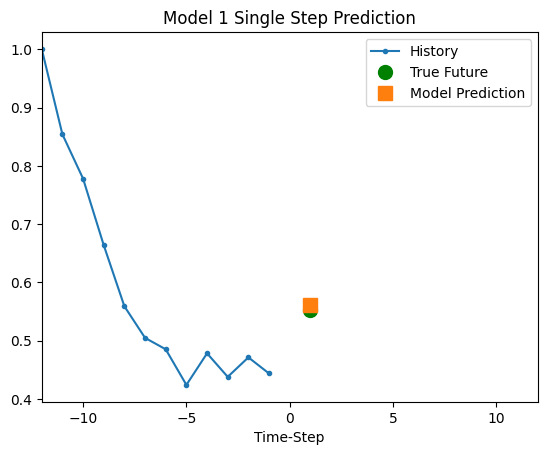

8/8 [==============================] - 0s 4ms/step


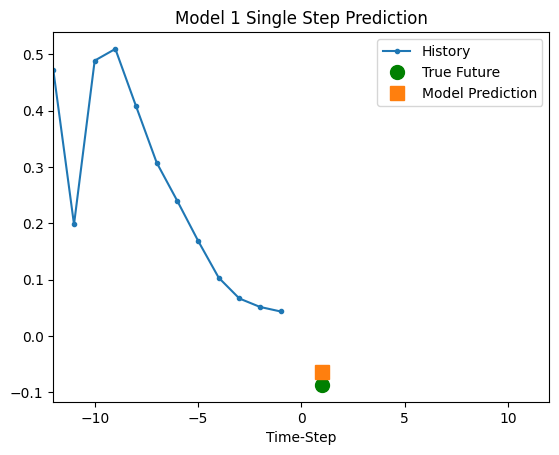

8/8 [==============================] - 0s 4ms/step


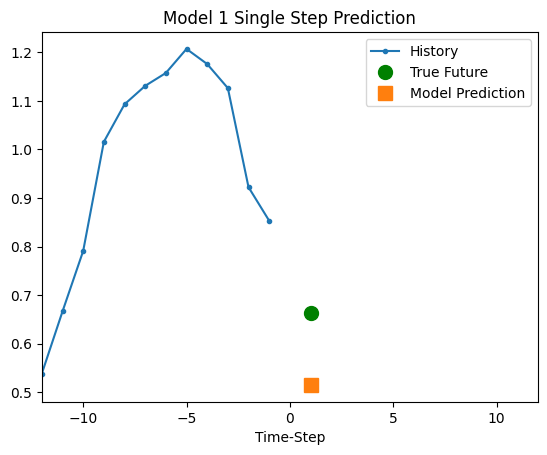

8/8 [==============================] - 0s 5ms/step


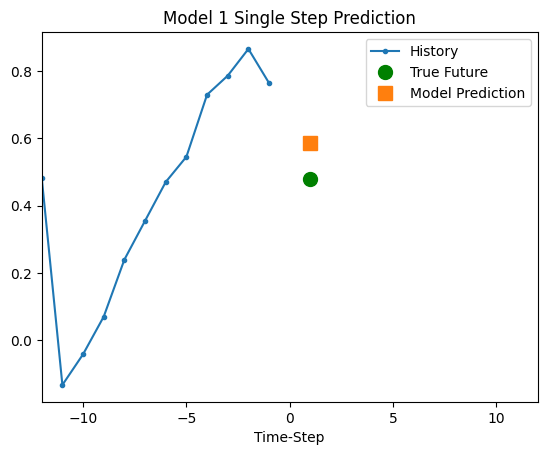

8/8 [==============================] - 0s 5ms/step


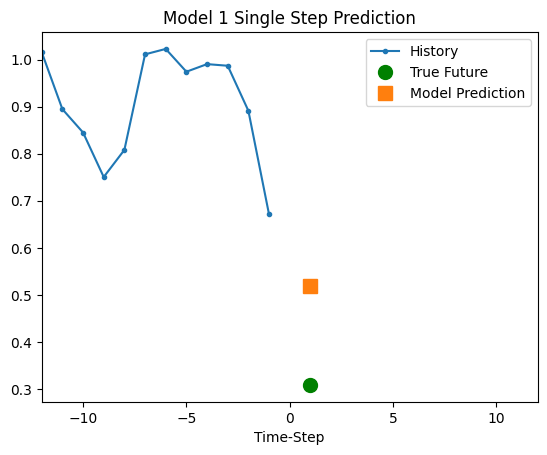

8/8 [==============================] - 0s 4ms/step


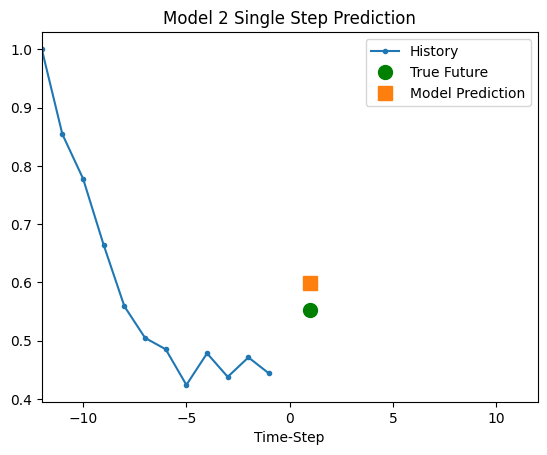

8/8 [==============================] - 0s 4ms/step


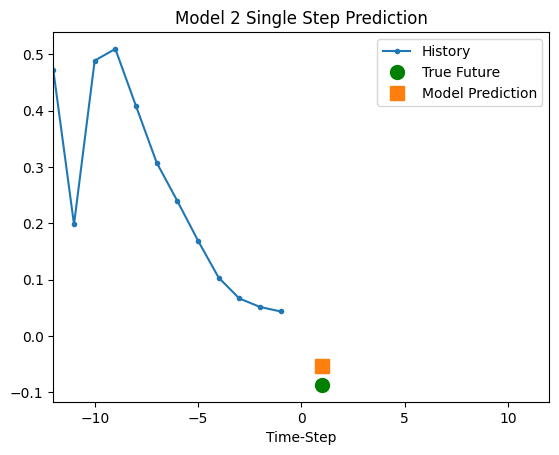

8/8 [==============================] - 0s 3ms/step


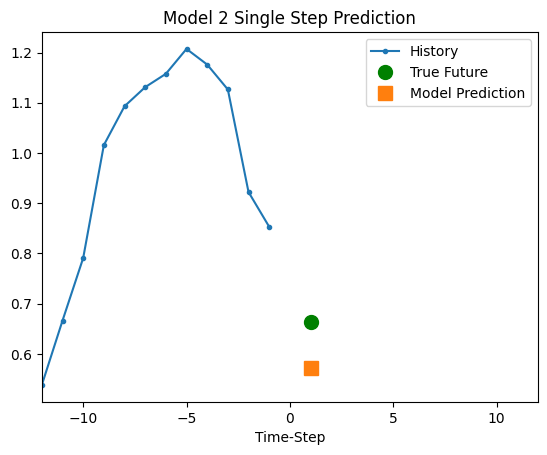

8/8 [==============================] - 0s 4ms/step


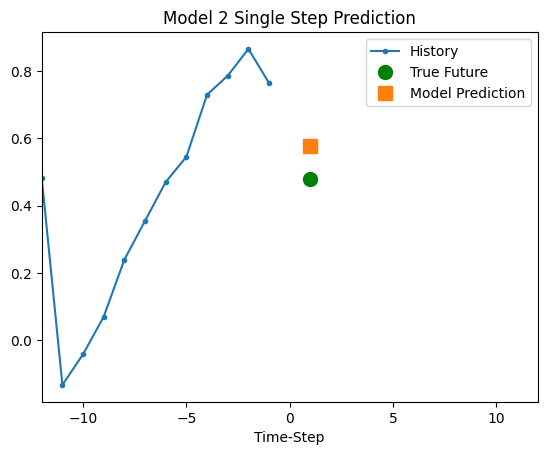

8/8 [==============================] - 0s 3ms/step


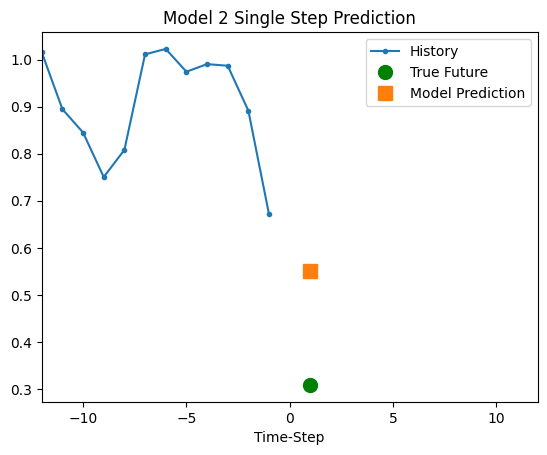

In [24]:
%matplotlib inline
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "go", "s"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    
    plt.title(title)
    for i, val in enumerate(plot_data):
      if i:
        plt.plot(delta, plot_data[i], marker[i], markersize=10, label=labels[i])
      else:
        plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (delta + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return

for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model_1.predict(x)[0]],
        1,
        "Model 1 Single Step Prediction",
    )

for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model_2.predict(x)[0]],
        1,
        "Model 2 Single Step Prediction",
    )

##Bonus

In [25]:
x_end = len(test_data) - past - future
label_start = train_split + past + future
x_test = test_data.iloc[:x_end].values
y_test = features.iloc[label_start:label_start+x_end][[1]]
dataset_test = keras.preprocessing.timeseries_dataset_from_array(x_test, y_test, sequence_length=sequence_length, sampling_rate=step,batch_size=batch_size,)

In [28]:
labels = y_test.values.flatten()
Gru_loss = model_1.evaluate(dataset_test)
print(f"GRU loss is equal to {round(Gru_loss,4)}")
Gru_pred = model_1.predict(dataset_test)

Rnn_loss = model_2.evaluate(dataset_test)
print(f"RNN loss is equal to {round(Rnn_loss,4)}")
Rnn_pred = model_2.predict(dataset_test)

if (Gru_loss < Rnn_loss):
  print (f'GRU model is better than RNN model with loss equal to {round(Gru_loss,4)}')
elif (Gru_loss > Rnn_loss): 
  print (f'RNN model is better than GRU model with loss equal to {round(Rnn_loss,4)}')
else:
  print (f'Two models have the same loss')

246/246 [==============================] - 11s 43ms/step - loss: 0.0252
GRU loss is equal to 0.0252
246/246 [==============================] - 10s 41ms/step - loss: 0.0256
RNN loss is equal to 0.0256
246/246 [==============================] - 10s 38ms/step
GRU model is better than RNN model with loss equal to 0.0252


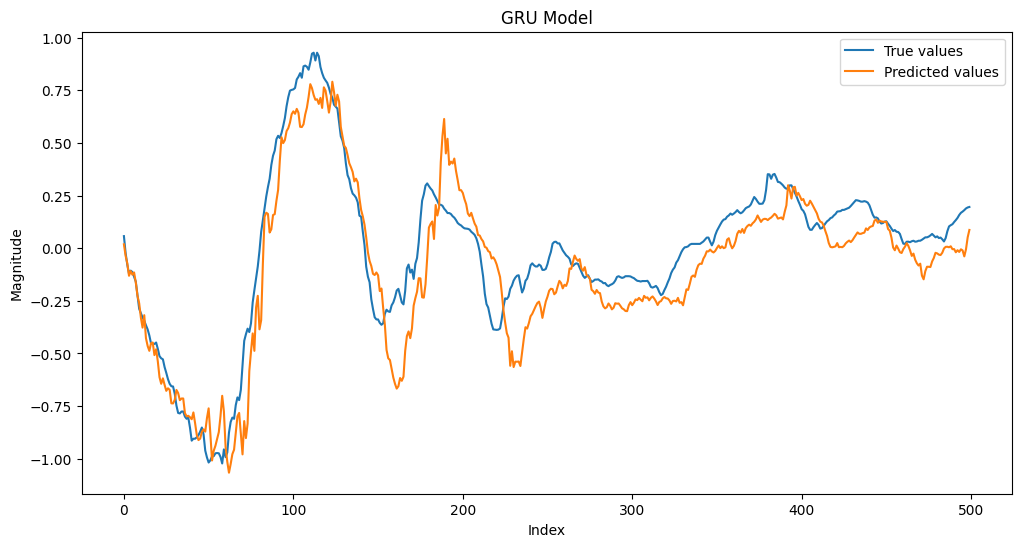

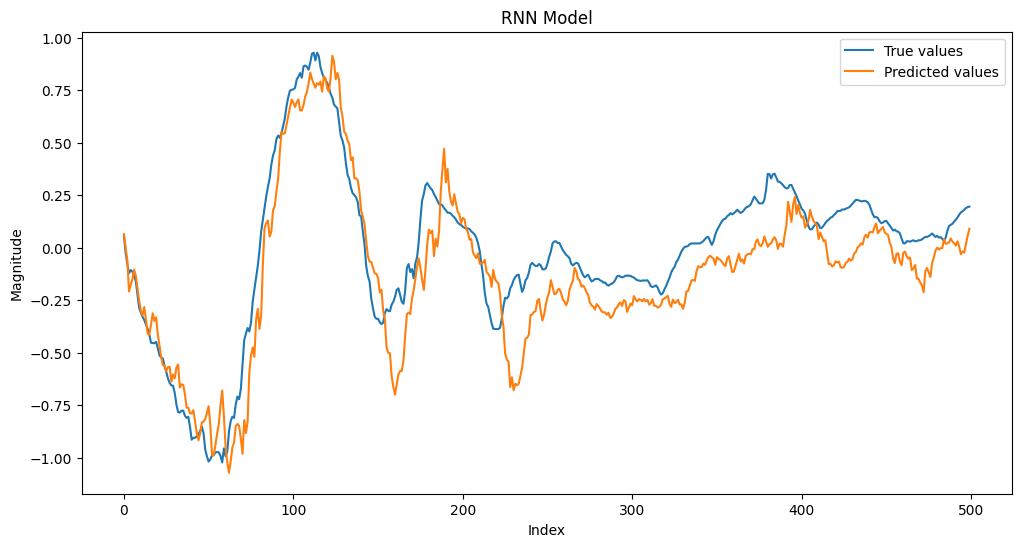

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(labels[0:500], label='True values')
plt.plot(Gru_pred[0:500], label='Predicted values')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.legend()
plt.title('GRU Model')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(labels[0:500], label='True values')
plt.plot(Rnn_pred[0:500], label='Predicted values')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.legend()
plt.title('RNN Model')
plt.show()